### Importing required libraries

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Importing datasets of five connections

In [2]:
first_dataset = pd.read_csv("five_conn/p75/first__connection_topo2_p075.csv")
second_dataset = pd.read_csv("five_conn/p75/second__connection_topo2_p075.csv")
third_dataset = pd.read_csv("five_conn/p75/third__connection_topo2_p075.csv")
fourth_dataset = pd.read_csv("five_conn/p75/fourth__connection_topo2_p075.csv")
fifth_dataset = pd.read_csv("five_conn/p75/fifth__connection_topo2_p075.csv")

In [3]:
df = pd.concat([first_dataset, second_dataset, third_dataset, fourth_dataset])
dataset = df.copy()

In [4]:
def get_max(train, test, col):
    return max(train[col].max(), test[col].max())

for col in df.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    df[col] = df[col]/max_val

for col in fifth_dataset.columns[80:]:
    max_val = get_max(dataset, fifth_dataset, col)
    fifth_dataset[col] = fifth_dataset[col]/max_val

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000317,1.0,0.996096,0.996096,0.933443,0.933443,0.931417,0.931417
1,0,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000314,1.0,0.986631,0.986631,0.934951,0.934951,0.932049,0.932049
2,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,1.000320,1.0,0.996089,0.996089,0.933443,0.933443,0.930896,0.930896
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0125,1.000312,1.0,0.979977,0.979977,0.936019,0.936019,0.932333,0.932333
4,1,0,0,0,0,0,0,0,0,0,...,0,0.3375,1.000318,1.0,0.986620,0.986620,0.934950,0.934950,0.931306,0.931306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001083,1.0,0.997180,0.997180,0.932799,0.932799,0.832114,0.832114
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001057,1.0,0.997502,0.997502,0.932764,0.932764,0.834626,0.834626
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001023,1.0,0.997847,0.997847,0.932731,0.932731,0.838096,0.838096
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000970,1.0,0.998240,0.998240,0.932701,0.932701,0.843546,0.843546


In [6]:
fifth_dataset

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.5875,1.000314,1.0,0.991751,0.991751,0.934135,0.934135,0.931947,0.931947
1,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000310,1.0,0.981264,0.981264,0.935814,0.935814,0.932758,0.932758
2,0,0,0,0,0,1,0,0,0,0,...,0,0.5875,1.000317,1.0,0.991744,0.991744,0.934134,0.934134,0.931476,0.931476
3,0,0,0,0,0,1,0,0,0,0,...,0,0.0750,1.000313,1.0,0.981255,0.981255,0.935813,0.935813,0.932170,0.932170
4,0,0,0,0,0,1,0,0,0,0,...,0,0.4875,1.000330,1.0,0.989662,0.989662,0.934458,0.934458,0.929213,0.929213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,1.001083,1.0,0.997180,0.997180,0.932799,0.932799,0.832114,0.832114
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,1.001057,1.0,0.997502,0.997502,0.932764,0.932764,0.834626,0.834626
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,1.001023,1.0,0.997847,0.997847,0.932731,0.932731,0.838096,0.838096
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,1.000970,1.0,0.998240,0.998240,0.932701,0.932701,0.843546,0.843546


In [7]:
df['pw'] = df['pw']/get_max(dataset, fifth_dataset, col)

In [8]:
fifth_dataset['pw'] = fifth_dataset['pw']/get_max(dataset, fifth_dataset, col)

In [10]:
df.to_csv('five_conn/norm/normalized_training_connection_topo_p075.csv')
fifth_dataset.to_csv('five_conn/norm/normalized_test_connection_topo_p075.csv')


In [11]:
X_train = df.copy()
X_train.drop(X_train.columns[-1:-4:-1], axis=1, inplace=True) #[-1:-6:-1]
y_train = df[df.columns[-1]]

In [12]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,77,78,79,80,ch,pw,path,s_ase,e_ase,s_osnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.038293,1.0,0.996096,0.996096,0.933443
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.038293,1.0,0.986631,0.986631,0.934951
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.8000,0.038293,1.0,0.996089,0.996089,0.933443
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0125,0.038292,1.0,0.979977,0.979977,0.936019
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.3375,0.038293,1.0,0.986620,0.986620,0.934950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9500,0.038322,1.0,0.997180,0.997180,0.932799
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9625,0.038321,1.0,0.997502,0.997502,0.932764
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9750,0.038320,1.0,0.997847,0.997847,0.932731
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0.9875,0.038318,1.0,0.998240,0.998240,0.932701


In [13]:
X_test = fifth_dataset.copy()
X_test.drop(X_test.columns[-1:-4:-1], axis=1, inplace=True)
y_test = fifth_dataset[fifth_dataset.columns[-1]]

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


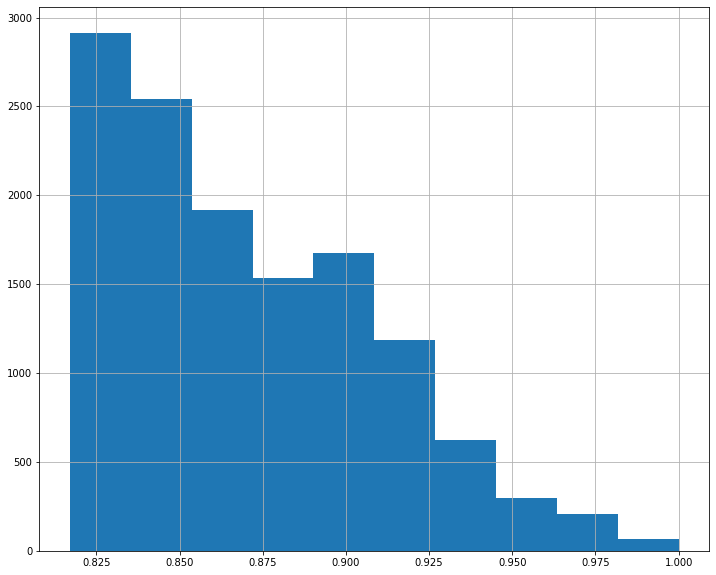

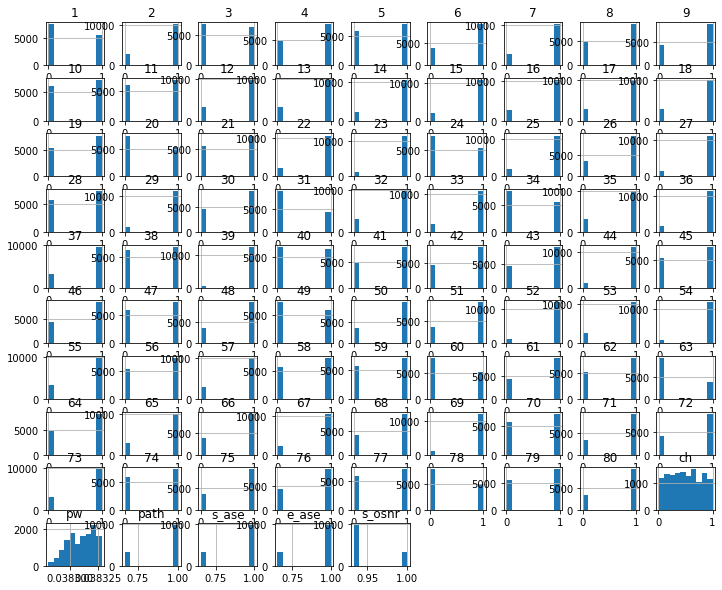

In [15]:
y_train.hist(figsize = (12,10))
X_train.hist(figsize = (12,10))
plt.show()

In [16]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12960, 86) (12960,)
(3240, 86) (3240,)


### Lasso Model for p={}

In [18]:
C=[100,1000,1500,2000,3000,4000,10000, 12000, 15000, 20000, 25000]
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score


for Ci in C:
    model = Lasso(alpha=1/(2*Ci),max_iter=7000)
    _ = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"C = {Ci}")
    print("Training score:", model.score(X_train, y_train))
    print("Testing score:", model.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    # print(f"{Ci} {model.score(Xtest,ytest)}")

C = 100
Training score: 0.7103866231807442
Testing score: 0.3356533396418756
MAE of Lasso Regression: 0.018503925125039896
RMSE of Lasso Regression: 0.021408884263052708 

C = 1000
Training score: 0.8948575288108996
Testing score: 0.7420775457178367
MAE of Lasso Regression: 0.010490020617117507
RMSE of Lasso Regression: 0.01333955164070901 

C = 1500
Training score: 0.9031533156468403
Testing score: 0.7521435112699922
MAE of Lasso Regression: 0.010259683277162595
RMSE of Lasso Regression: 0.013076659119486642 

C = 2000
Training score: 0.914360922551043
Testing score: 0.7838132785214944
MAE of Lasso Regression: 0.00969003006558433
RMSE of Lasso Regression: 0.01221268523712147 

C = 3000
Training score: 0.9229817037816503
Testing score: 0.8077935965958236
MAE of Lasso Regression: 0.009203806437212261
RMSE of Lasso Regression: 0.01151544120804623 

C = 4000
Training score: 0.9265285275243618
Testing score: 0.8077015154232174
MAE of Lasso Regression: 0.009297131391538612
RMSE of Lasso Reg

### Ridge Model for p = 0

In [21]:
C=[5,10,50,100,1000,1500,2000,3000,4000,10000]
for Ci in C:
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train_lr= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, pred_train_lr))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, pred_train_lr)), '\n')


C = 5
Training score: 0.9329854547630828
Testing score: 0.8337683064804957
MAE of Lasso Regression: 0.008523947260732486
RMSE of Lasso Regression: 0.010709114721225228 

C = 10
Training score: 0.9333267502196553
Testing score: 0.8352033819151128
MAE of Lasso Regression: 0.008486138496275141
RMSE of Lasso Regression: 0.01066278871730624 

C = 50
Training score: 0.9348015760191838
Testing score: 0.8420115173292051
MAE of Lasso Regression: 0.00830409157815394
RMSE of Lasso Regression: 0.010440213268353092 

C = 100
Training score: 0.9354738851074048
Testing score: 0.8459790080914293
MAE of Lasso Regression: 0.008196930225133566
RMSE of Lasso Regression: 0.010308289675647076 

C = 1000
Training score: 0.9369057557862573
Testing score: 0.8552122420057771
MAE of Lasso Regression: 0.007940722817015541
RMSE of Lasso Regression: 0.009994534647884579 

C = 1500
Training score: 0.93733707967981
Testing score: 0.8565385728574741
MAE of Lasso Regression: 0.007903242434039878
RMSE of Lasso Regressio

In [79]:
X

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,0.999074,1.0,0.996096,0.996096,0.933432,0.933432,0.931417,0.931417
1,0,0,0,0,0,0,0,0,0,0,...,0,0.3375,0.999071,1.0,0.986631,0.986631,0.934940,0.934940,0.932049,0.932049
2,0,0,0,0,0,0,0,0,0,0,...,0,0.8000,0.999077,1.0,0.996089,0.996089,0.933431,0.933431,0.930896,0.930896
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0125,0.999069,1.0,0.979977,0.979977,0.936008,0.936008,0.932333,0.932333
4,1,0,0,0,0,0,0,0,0,0,...,0,0.3375,0.999075,1.0,0.986620,0.986620,0.934939,0.934939,0.931306,0.931306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,0.9500,0.999839,1.0,0.997180,0.997180,0.932788,0.932788,0.832114,0.832114
3236,1,1,1,1,1,1,1,1,1,1,...,1,0.9625,0.999813,1.0,0.997502,0.997502,0.932752,0.932752,0.834626,0.834626
3237,1,1,1,1,1,1,1,1,1,1,...,1,0.9750,0.999779,1.0,0.997847,0.997847,0.932719,0.932719,0.838096,0.838096
3238,1,1,1,1,1,1,1,1,1,1,...,1,0.9875,0.999726,1.0,0.998240,0.998240,0.932690,0.932690,0.843546,0.843546


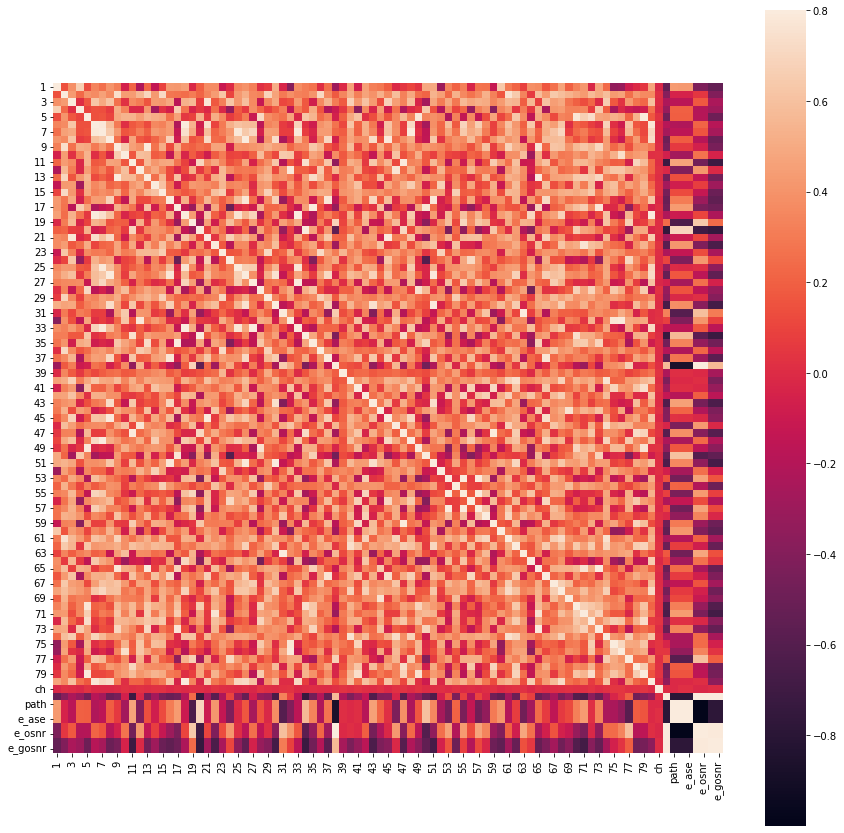

In [140]:
Cx = dataset.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

### RandomForest Model for p={}

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

estimators=[100, 200, 300, 1000]
for  Ei in estimators:
    print(f"Estimator - {Ei}")
    model = RandomForestRegressor(n_estimators=Ei)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    MAE = mean_absolute_error(y_test , predicted)
    print('Random forest validation MAE = ', MAE)
    # Display accuracy score
    print(f'Random forest accuracy = ', model.score(X_test, y_test))
    print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Estimator - 100
Random forest validation MAE =  0.003934247303707092
Random forest accuracy =  0.9298398226728729
RMSE forest =  0.006957320259863458
Estimator - 200
Random forest validation MAE =  0.003672316526951832
Random forest accuracy =  0.9355235078854442
RMSE forest =  0.0066695626584037425
Estimator - 300
Random forest validation MAE =  0.003630693404077197
Random forest accuracy =  0.9361460739458386
RMSE forest =  0.006637284884696722
Estimator - 1000
Random forest validation MAE =  0.0035842118846517827
Random forest accuracy =  0.9368704186097893
RMSE forest =  0.006599531574998707


### LinearRegression Model for p={}


In [19]:
# LINEARREGRESSION MODEL 

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
r2_score(y_test,linear.predict(X_test))

accuracy score for linear:  0.9306790479565171
RMSE for linear : 0.00691558487183141


0.9306790479565171

In [160]:
X_train

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,ch,pw,path,s_ase,e_ase,s_osnr,s_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.8000,0.038293,1.0,0.996096,0.996096,0.933432,0.931417
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.3375,0.038293,1.0,0.986631,0.986631,0.934940,0.932049
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.8000,0.038293,1.0,0.996089,0.996089,0.933431,0.930896
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0125,0.038292,1.0,0.979977,0.979977,0.936008,0.932333
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0.3375,0.038293,1.0,0.986620,0.986620,0.934939,0.931306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0.9500,0.038322,1.0,0.997180,0.997180,0.932788,0.832114
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0.9625,0.038321,1.0,0.997502,0.997502,0.932752,0.834626
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0.9750,0.038320,1.0,0.997847,0.997847,0.932719,0.838096
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0.9875,0.038318,1.0,0.998240,0.998240,0.932690,0.843546
